In [18]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
df = pd.read_csv('titanic_train_original.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(0.0, 537.94566)

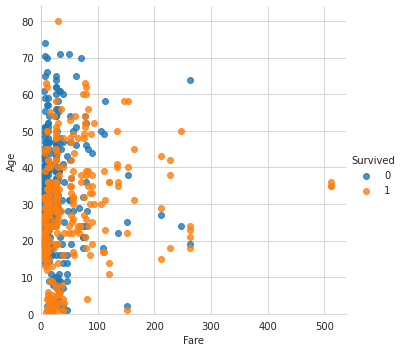

In [19]:
# Scatterplot arguments
sns.lmplot(x='Fare', y='Age', data=df,
           fit_reg=False, # No regression line
           hue='Survived')   # Color by evolution stage

# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

# Alternative way
# sns.lmplot(x=df.Attack, y=df.Defense)

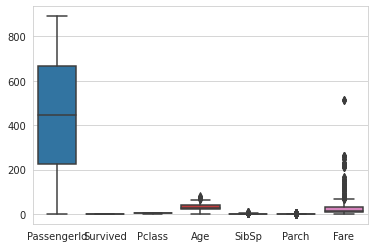

In [20]:
# Boxplot
sns.boxplot(data=df)

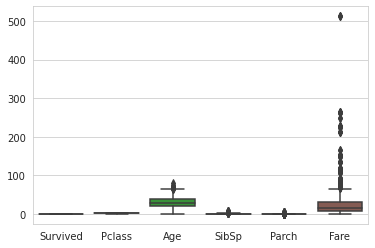

In [21]:
# Pre-format DataFrame
stats_df = df.drop(['PassengerId'], axis=1)
 
# New boxplot using stats_df
sns.boxplot(data=stats_df)

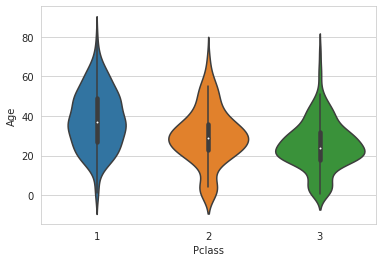

In [22]:
# Set theme
sns.set_style('whitegrid')
 
# Violin plot
sns.violinplot(x='Pclass', y='Age', data=df)

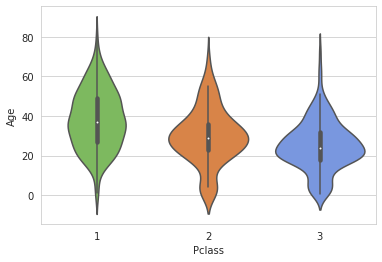

In [23]:
titanic_type_colors =  ['#78C850',  # Grass
                        '#F08030',  # Fire
                        '#6890F0',  # Water
                        ]

# Violin plot with Pokemon color palette
sns.violinplot(x='Pclass', y='Age', data=df, 
               palette=titanic_type_colors) # Set color palette

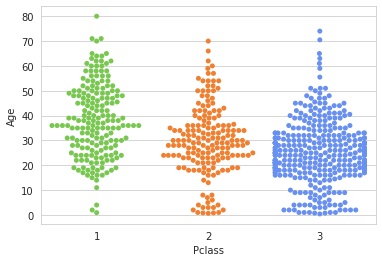

In [24]:
# Swarm plot with Pokemon color palette
sns.swarmplot(x='Pclass', y='Age', data=df, 
              palette=titanic_type_colors)

Text(0.5, 1.0, 'Age of Ticket Class purchases')

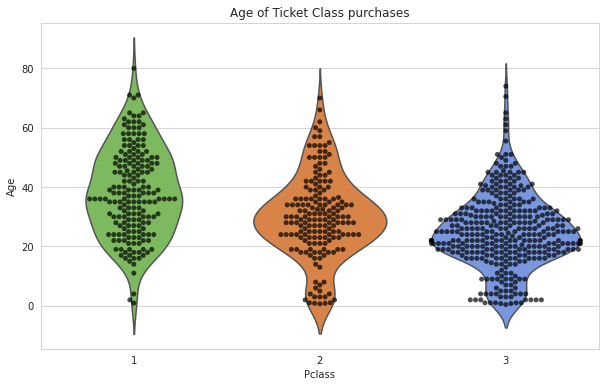

In [25]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Pclass',
               y='Age', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=titanic_type_colors)
 
sns.swarmplot(x='Pclass', 
              y='Age', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Age of Ticket Class purchases')

In [26]:
stats_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
# Melt DataFrame
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Sex", "Ticket", "Cabin", "Embarked", "Survived"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()

,Name,Sex,Ticket,Cabin,Embarked,Survived,Stat,value
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,0,Pclass,3.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,1,Pclass,1.0
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S,1,Pclass,3.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,1,Pclass,1.0
4,"Allen, Mr. William Henry",male,373450,NaN,S,0,Pclass,3.0


In [28]:
print( stats_df.shape )
print( melted_df.shape )

(891, 11)
(4455, 8)


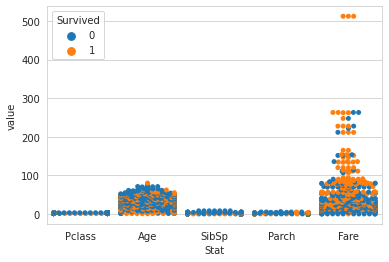

In [29]:
# # Swarmplot with melted_df
sns.swarmplot(x='Stat', y='value', data=melted_df, 
              hue='Survived')

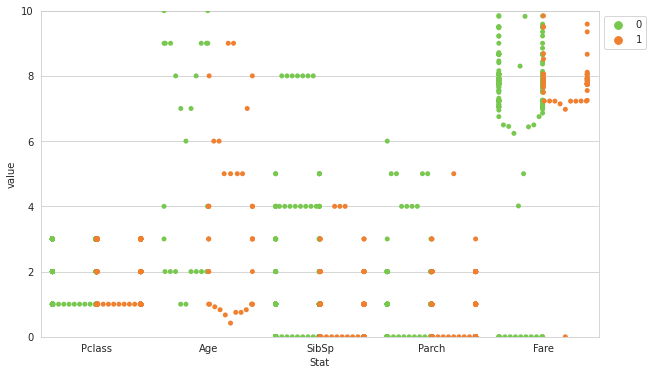

In [30]:
# 1. Enlarge the plot
plt.figure(figsize=(10,6))
 
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Survived', 
              dodge=True, # 2. Separate points by hue
              palette=titanic_type_colors) # 3. Use Pokemon palette
 
# 4. Adjust the y-axis
plt.ylim(0, 10) #Fare has a few outliers past 100
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)